# Part II - Punt Review
## by David Krejcarek

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
punt_data = pd.read_csv(os.path.join('data', 'punt_data.csv'))

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Punt Length

The punt data is normall distributed about 

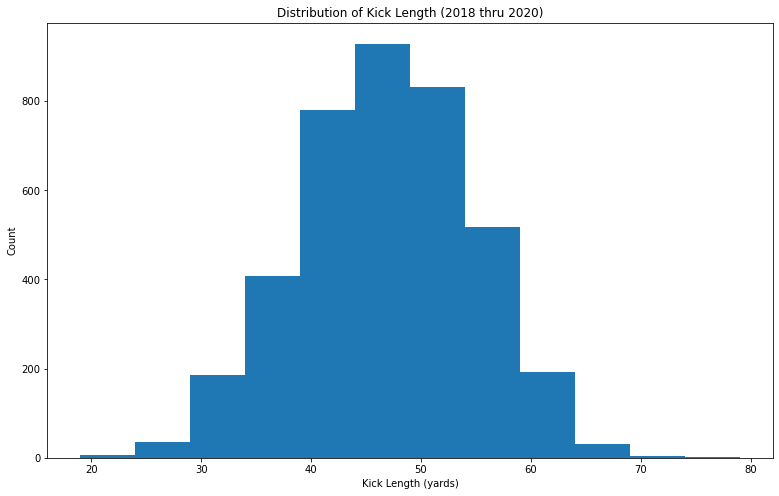

In [7]:
bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 5, 5)

plt.figure(figsize=[13,8])
plt.hist(data = punt_data, x = 'kickLength', bins = bins)
plt.title('Distribution of Kick Length (2018 thru 2020)')
plt.xlabel('Kick Length (yards)')
plt.ylabel('Count');

## Average Rreturn Yard per Return

We first looked at the 
> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

### Average Return Yards per Return

In [4]:
# Determine the yards per return average by season
def get_return_data(s, df):
    if s == 'All':
         # Get the data for number of return counts
        punt_return_counts = df.query('specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner
    else:
        # Get the data for number of return counts
        punt_return_counts = df.query('season == {} & specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('season ==  {} & specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner

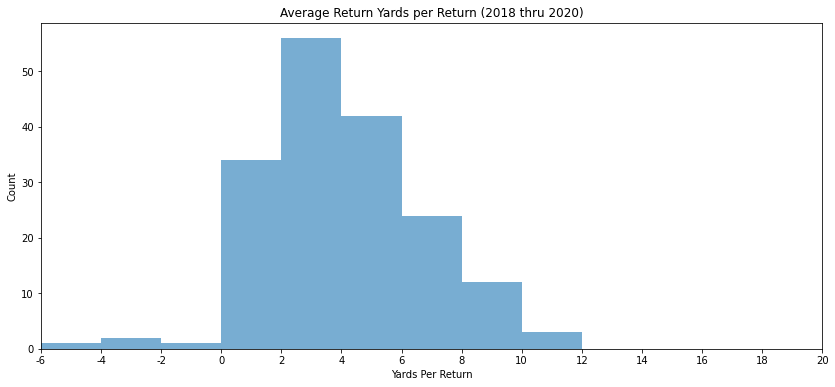

In [6]:
seasons = punt_data.season.value_counts().index
min_x = -6
max_x = 20
step = 2
x_layout = np.arange(min_x, max_x + step, step)

plt.figure(figsize=[14,6])

returner_data = get_return_data('All', punt_data)
 
bins = x_layout
plt.hist(returner_data['punt_yard_per_return'], alpha = .6, label='Punt', bins = bins)
plt.title('Average Return Yards per Return (2018 thru 2020)')
plt.xticks(x_layout, x_layout) 
plt.xlim(min_x, max_x)
plt.xlabel('Yards Per Return')
plt.ylabel('Count');

## Distribution of Hang Time

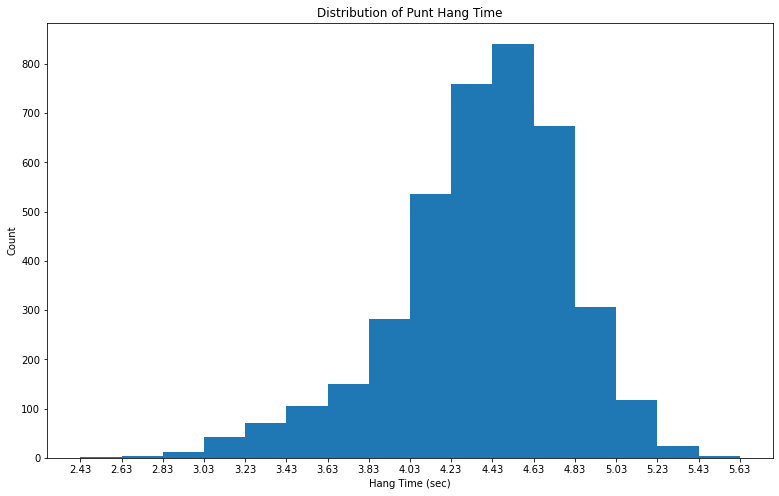

In [11]:
plt.figure(figsize=[13,8])
bins = np.arange(punt_data.hangTime.min(), punt_data.hangTime.max() + .2, .2)

plt.hist(punt_data.hangTime, bins=bins) 
plt.title('Distribution of Punt Hang Time')
plt.xticks(bins)
plt.xlabel('Hang Time (sec)')
plt.ylabel('Count');

## Hang Time and Kick Length Verusu Punt Result



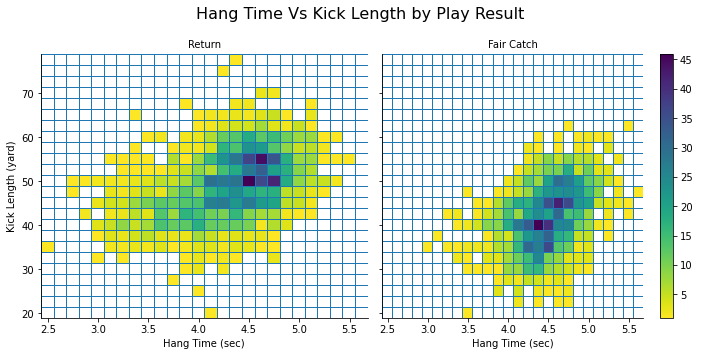

In [10]:
# plot to see if there is a corelation between hang time and kick length
x_bins = np.arange(punt_data.hangTime.min(), punt_data['hangTime'].max() + 0.125, 0.125)
y_bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 2.5, 2.5)

# plot the hang time versus kick length split among Return and Fair Catch.  With the amoutn of data two seperate heat maps would make more since
g = sb.FacetGrid(data = punt_data, col = 'specialTeamsResult', height=5, aspect = 1)
g.map(plt.hist2d, 'hangTime', 'kickLength', cmin=.5, cmap='viridis_r', bins = [x_bins, y_bins])
g.fig.subplots_adjust(top  = 0.85)
g.fig.suptitle('Hang Time Vs Kick Length by Play Result', fontsize=16)
g.set_titles("{col_name}") # use this argument literally
g.set_axis_labels('Hang Time (sec)', 'Kick Length (yard)')
plt.colorbar()
g.add_legend();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 